In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import yfinance as yf
from tensorflow import keras
from keras import Sequential
from keras.layers import SimpleRNN, LSTM, Dense

In [2]:
series = yf.Ticker("GC=F")
prices = series.history(start='2019-01-06', end='2024-07-12').Close

Text(0, 0.5, 'Prices')

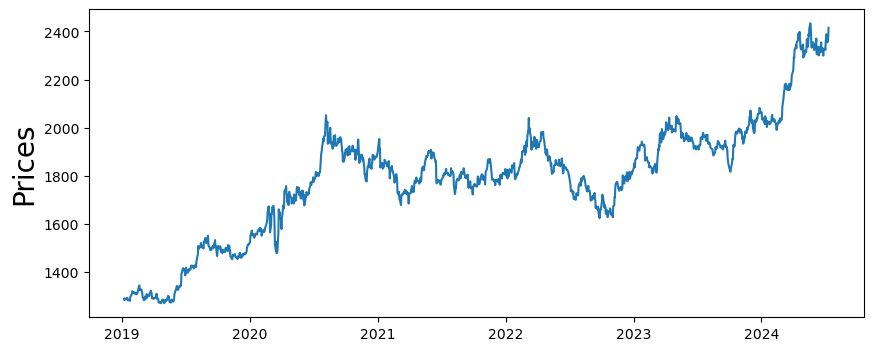

In [3]:
plt.figure(figsize=(10,4))
plt.plot(prices)
plt.ylabel('Prices', fontsize=20)

In [4]:
window_size = 5

data_train = prices[:'2024-01-01'].to_numpy()
data_test = prices['2024-01-01':].to_numpy()

X_train = []
y_train = []
for i in range(len(data_train) - window_size):
    X_train.append(data_train[i: i + window_size])
    y_train.append(data_train[i+window_size])

X_test = []
y_test = []
for i in range(len(data_test) - window_size):
    X_test.append(data_test[i: i + window_size])
    y_test.append(data_test[i+window_size])

X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

In [5]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [6]:
print('X_train shape = ', X_train.shape)
print('y_train shape = ', y_train.shape,'\n')

print('X_test shape = ', X_test.shape)
print('y_test shape = ', y_test.shape)

X_train shape =  (1251, 5, 1)
y_train shape =  (1251,) 

X_test shape =  (127, 5, 1)
y_test shape =  (127,)


In [7]:
model = Sequential()
model.add(SimpleRNN(64, activation='relu', return_sequences=True, input_shape=(window_size, 1)))
model.add(SimpleRNN(64, activation='relu', return_sequences=True))
model.add(SimpleRNN(64, activation='relu'))
model.add(Dense(1))

In [8]:
model.compile(loss='mse', optimizer='adam')
model.fit(np.array(X_train), np.array(y_train), epochs=25, verbose=1)

Epoch 1/25
40/40 [==============================] - 2s 2ms/step - loss: 75324.2969
Epoch 2/25
40/40 [==============================] - 0s 2ms/step - loss: 1013.7873
Epoch 3/25
40/40 [==============================] - 0s 2ms/step - loss: 700.9615
Epoch 4/25
40/40 [==============================] - 0s 2ms/step - loss: 668.2766
Epoch 5/25
40/40 [==============================] - 0s 2ms/step - loss: 668.7813
Epoch 6/25
40/40 [==============================] - 0s 2ms/step - loss: 682.4094
Epoch 7/25
40/40 [==============================] - 0s 2ms/step - loss: 774.2736
Epoch 8/25
40/40 [==============================] - 0s 2ms/step - loss: 657.3108
Epoch 9/25
40/40 [==============================] - 0s 2ms/step - loss: 650.9414
Epoch 10/25
40/40 [==============================] - 0s 2ms/step - loss: 648.4464
Epoch 11/25
40/40 [==============================] - 0s 2ms/step - loss: 634.7075
Epoch 12/25
40/40 [==============================] - 0s 2ms/step - loss: 640.7612
Epoch 13/25
40/40 [===

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 5, 64)             4224      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 5, 64)             8256      
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 64)                8256      
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 20801 (81.25 KB)
Trainable params: 20801 (81.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
results = model.predict(np.array(X_test))

4/4 [==============================] - 0s 1ms/step


In [11]:
print(len(results))

127


In [12]:
# Align the prediction series with the original test data
pred_series = pd.Series(results.flatten(), index=prices['2024-01-01':].index[window_size:window_size + len(results)])

In [13]:
print(pred_series)

Date
2024-01-09 00:00:00-05:00    2020.698853
2024-01-10 00:00:00-05:00    2013.490601
2024-01-11 00:00:00-05:00    2010.053223
2024-01-12 00:00:00-05:00    2004.845825
2024-01-16 00:00:00-05:00    2007.925659
                                ...     
2024-07-05 00:00:00-04:00    2311.778564
2024-07-08 00:00:00-04:00    2328.312988
2024-07-09 00:00:00-04:00    2334.655029
2024-07-10 00:00:00-04:00    2337.125977
2024-07-11 00:00:00-04:00    2343.171143
Length: 127, dtype: float32


In [14]:
print(prices['2024-01-01':])

Date
2024-01-02 00:00:00-05:00    2064.399902
2024-01-03 00:00:00-05:00    2034.199951
2024-01-04 00:00:00-05:00    2042.300049
2024-01-05 00:00:00-05:00    2042.400024
2024-01-08 00:00:00-05:00    2026.599976
                                ...     
2024-07-05 00:00:00-04:00    2388.500000
2024-07-08 00:00:00-04:00    2355.199951
2024-07-09 00:00:00-04:00    2360.100098
2024-07-10 00:00:00-04:00    2372.199951
2024-07-11 00:00:00-04:00    2415.000000
Name: Close, Length: 132, dtype: float64


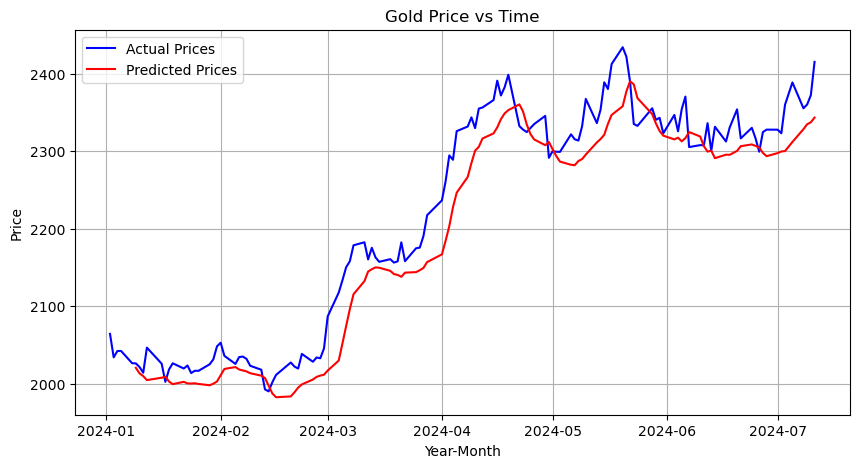

In [15]:
prices_2024 = prices['2024-01-01':]
plt.figure(figsize=(10, 5))
plt.plot(prices_2024, color='blue', label='Actual Prices')
plt.plot(pred_series, color='red', label='Predicted Prices')
plt.legend()
plt.xlabel('Year-Month')
plt.ylabel('Price')
plt.title('Gold Price vs Time')
plt.grid(True)
plt.show()


# plt.figure(figsize=(10, 5))
# plt.plot(prices, color='blue', label='Actual Prices')
# plt.plot(pred_series, color='red', label='Predicted Prices')
# plt.legend()
# plt.xlabel('Year-Month')
# plt.ylabel('Price')
# plt.title('Gold Price vs Time')
# plt.grid(True)
# plt.show()



Right Direction Prediction Count: 76 --> Within 0.5% Error Count: 22
Wrong Direction Prediction Count: 51


C:\Users\jessi\AppData\Local\Temp\ipykernel_18640\3451082727.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (pred_series[i] > pred_series[i - 1] and prices_2024[i] < prices_2024[i - 1]) or \
C:\Users\jessi\AppData\Local\Temp\ipykernel_18640\3451082727.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (pred_series[i] < pred_series[i - 1] and prices_2024[i] > prices_2024[i - 1]):
C:\Users\jessi\AppData\Local\Temp\ipykernel_18640\3451082727.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataF

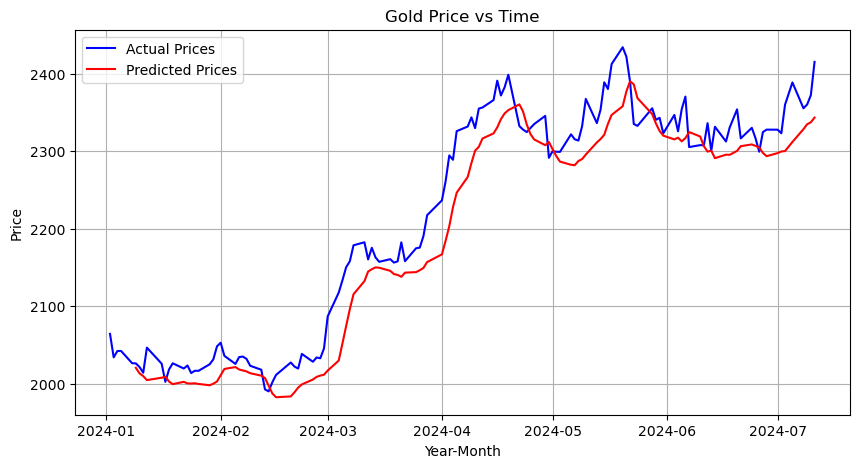

In [16]:
# Calculate wrong direction prediction count and within 10% error count only if in the right direction
wrong_direction_count = 0
within_percent_count = 0
percent = 0.005

for i in range(1, len(pred_series)):
    if (pred_series[i] > pred_series[i - 1] and prices_2024[i] < prices_2024[i - 1]) or \
       (pred_series[i] < pred_series[i - 1] and prices_2024[i] > prices_2024[i - 1]):
        wrong_direction_count += 1
    else:
        if abs((pred_series[i] - prices_2024[i]) / prices_2024[i]) <= percent:
            within_percent_count += 1

# Print the metrics
print('\n')
print(f"Right Direction Prediction Count: {len(pred_series) - wrong_direction_count}", "-->", f"Within {percent*100}% Error Count: {within_percent_count}")
print(f"Wrong Direction Prediction Count: {wrong_direction_count}")

# Plotting the prices from 2024 onwards
plt.figure(figsize=(10, 5))
plt.plot(prices_2024, color='blue', label='Actual Prices')
plt.plot(pred_series, color='red', label='Predicted Prices')
plt.legend()
plt.xlabel('Year-Month')
plt.ylabel('Price')
plt.title('Gold Price vs Time')
plt.grid(True)
plt.show()



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=32dc799c-5691-4476-86b0-a694e4cd4e54' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>